In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from google.colab import files

In [9]:
 #Load dataset
df = pd.read_csv("Customers.csv")

In [10]:
# Drop CustomerID as it's not useful
df = df.drop(columns=["CustomerID"], errors='ignore')

In [11]:
# Handle missing values
df = df.dropna()


In [15]:
# Encode categorical variables
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Profession"] = le.fit_transform(df["Profession"])

In [16]:
# Define target variable (Assuming Spending Score > 50 means positive response)
df["Response"] = (df["Spending Score (1-100)"] > 50).astype(int)
df = df.drop(columns=["Spending Score (1-100)"])


In [17]:
# Split dataset
X = df.drop(columns=["Response"])
y = df["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [20]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


In [21]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [22]:
# Display results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
[[109  86]
 [102  96]]
Accuracy: 0.52
Precision: 0.53
Recall: 0.48
F1-Score: 0.51


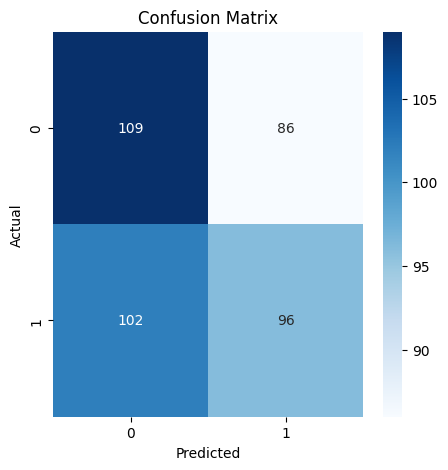

In [23]:
# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


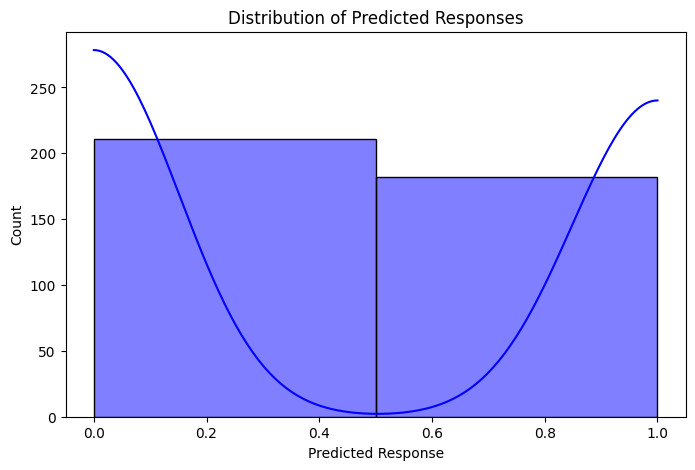

In [24]:
# Visualization of predictions
plt.figure(figsize=(8,5))
sns.histplot(y_pred, kde=True, bins=2, color='blue')
plt.xlabel("Predicted Response")
plt.ylabel("Count")
plt.title("Distribution of Predicted Responses")
plt.show()


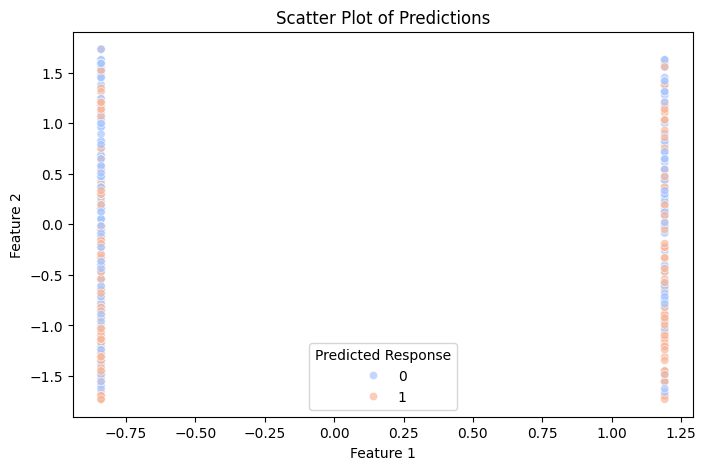

In [25]:
# Scatter plot of two important features
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred, palette='coolwarm', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Predictions")
plt.legend(title="Predicted Response")
plt.show()
